# Unsupervised Learning Techniques


In this chapter, we will look at a few more unsupervised learning tasks
and algorithms:


• Clustering: the goal is to group similar instances together into clusters. This is a
great tool for data analysis, customer segmentation, recommender systems,
search engines, image segmentation, semi-supervised learning, dimensionality
reduction, and more.



• Anomaly detection: the objective is to learn what “normal” data looks like, and
use this to detect abnormal instances, such as defective items on a production
line or a new trend in a time series.



• Density estimation: this is the task of estimating the probability density function
(PDF) of the random process that generated the dataset. This is commonly used
for anomaly detection: instances located in very low-density regions are likely to
be anomalies. It is also useful for data analysis and visualization

# Clustering

on the left is the iris dataset (introduced in
Chapter 4), where each instance’s species (i.e., its class) is represented with a different
marker. It is a labeled dataset, for which classification algorithms such as Logistic
Regression, SVMs or Random Forest classifiers are well suited. On the right is the
same dataset, but without the labels, so you cannot use a classification algorithm any‐
more. This is where clustering algorithms step in:

Just like in classification, each instance gets assigned to a group. However, this is an
unsupervised task. Consider Figure 9-1: on the left is the iris dataset (introduced in
Chapter 4), where each instance’s species (i.e., its class) is represented with a different
marker. It is a labeled dataset, for which classification algorithms such as Logistic
Regression, SVMs or Random Forest classifiers are well suited. On the right is the
same dataset, but without the labels, so you cannot use a classification algorithm any‐
more. This is where clustering algorithms step in:

In this section, we will look at two popular clustering algorithms: K-Means and
DBSCAN, and we will show some of their applications, such as non-linear dimen‐
sionality reduction, semi-supervised learning and anomaly detection.

# K-Means

Let’s train a K-Means clusterer on this dataset. It will try to find each blob’s center and
assign each instance to the closest blob:


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt


In [2]:
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=5, cluster_std=[0.5, 0.5, 0.5, 1, 1])

In [3]:
y

array([1, 2, 3, 1, 4, 1, 1, 4, 1, 2, 1, 4, 1, 1, 3, 0, 3, 1, 1, 4, 2, 0,
       4, 4, 4, 4, 3, 4, 0, 4, 3, 2, 4, 4, 4, 3, 4, 3, 2, 4, 2, 0, 2, 0,
       0, 2, 4, 0, 3, 4, 0, 0, 0, 2, 1, 3, 4, 4, 4, 2, 4, 1, 1, 4, 3, 4,
       3, 2, 3, 1, 3, 2, 2, 4, 3, 4, 0, 3, 0, 2, 4, 2, 0, 0, 3, 1, 1, 2,
       0, 3, 4, 2, 0, 0, 3, 1, 0, 3, 1, 3, 2, 4, 0, 2, 1, 2, 1, 0, 2, 2,
       2, 3, 4, 2, 0, 0, 4, 0, 2, 4, 1, 0, 1, 1, 1, 0, 3, 2, 0, 0, 0, 1,
       0, 2, 1, 4, 0, 0, 2, 4, 2, 4, 2, 0, 1, 1, 0, 0, 3, 1, 2, 1, 1, 3,
       2, 2, 0, 2, 2, 3, 1, 3, 4, 4, 0, 0, 0, 4, 4, 3, 0, 2, 2, 1, 3, 3,
       3, 2, 0, 0, 2, 1, 0, 1, 2, 4, 2, 2, 1, 1, 4, 3, 1, 0, 3, 0, 3, 0,
       1, 0, 0, 1, 0, 0, 4, 3, 4, 1, 1, 2, 4, 4, 4, 1, 3, 4, 3, 3, 1, 3,
       4, 0, 3, 2, 3, 1, 2, 1, 2, 3, 2, 3, 2, 1, 2, 2, 1, 4, 1, 0, 1, 1,
       1, 4, 1, 3, 4, 0, 3, 3, 0, 3, 1, 1, 0, 2, 0, 0, 2, 3, 3, 2, 0, 0,
       3, 0, 4, 0, 0, 3, 2, 3, 1, 1, 0, 0, 2, 0, 2, 4, 4, 0, 3, 0, 1, 1,
       4, 2, 4, 3, 1, 3, 3, 0, 3, 4, 3, 0, 1, 3, 4,

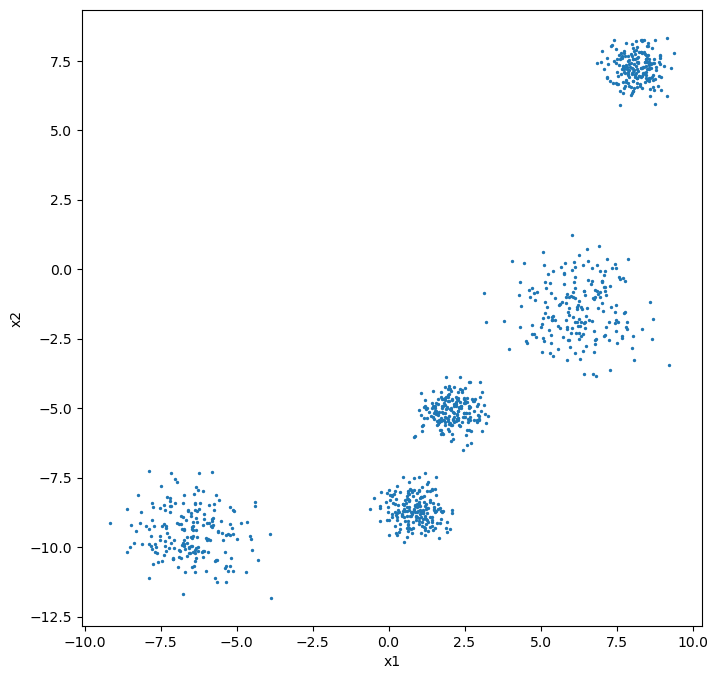

In [4]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=2) #here X[0] contains x1 and x2 which are splited 
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [5]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

Each instance was assigned to one of the 5 clusters. In the context of clustering, an
instance’s label is the index of the cluster that this instance gets assigned to by the
algorithm: this is not to be confused with the class labels in classification (remember
that clustering is an unsupervised learning task). The KMeans instance preserves a
copy of the labels of the instances it was trained on, available via the labels_ instance
variable:


each value of y_pred is the cluster index if algorithm form 5 cluster then they are labeled from 0-4

In [6]:
y_pred

array([1, 4, 3, 1, 2, 1, 1, 2, 1, 4, 1, 2, 1, 1, 3, 0, 3, 1, 1, 2, 4, 0,
       2, 2, 2, 2, 3, 2, 0, 2, 3, 4, 2, 2, 2, 3, 2, 3, 4, 2, 4, 0, 4, 0,
       0, 4, 2, 0, 3, 2, 0, 0, 0, 4, 1, 3, 2, 2, 2, 4, 2, 1, 1, 2, 3, 2,
       3, 4, 3, 1, 3, 4, 4, 2, 3, 2, 0, 3, 0, 4, 2, 4, 0, 0, 3, 1, 1, 4,
       0, 3, 2, 4, 0, 0, 3, 1, 0, 3, 1, 3, 4, 2, 0, 4, 1, 4, 1, 0, 4, 4,
       4, 3, 2, 4, 0, 0, 2, 0, 4, 2, 1, 0, 1, 1, 1, 0, 3, 4, 0, 0, 0, 1,
       0, 4, 1, 2, 0, 0, 4, 2, 4, 2, 4, 0, 1, 1, 0, 0, 3, 1, 4, 1, 1, 3,
       4, 4, 0, 4, 4, 3, 1, 3, 2, 2, 0, 0, 0, 2, 2, 3, 0, 4, 4, 1, 3, 3,
       3, 4, 0, 0, 4, 1, 0, 1, 4, 2, 4, 4, 1, 1, 2, 3, 1, 0, 3, 0, 3, 0,
       1, 0, 0, 1, 0, 0, 2, 3, 2, 1, 1, 4, 2, 2, 2, 1, 3, 2, 3, 3, 1, 3,
       2, 0, 3, 4, 3, 1, 4, 1, 4, 3, 4, 3, 4, 1, 4, 4, 1, 2, 1, 0, 1, 1,
       1, 2, 1, 3, 2, 0, 3, 3, 0, 3, 1, 1, 0, 4, 0, 0, 4, 3, 3, 4, 0, 0,
       3, 0, 2, 0, 0, 3, 4, 3, 1, 1, 0, 0, 4, 0, 4, 2, 2, 0, 3, 0, 1, 1,
       2, 4, 2, 3, 1, 3, 3, 0, 3, 2, 3, 0, 1, 3, 2,

In [7]:
y_pred
y_pred is kmeans.labels_


True

We can also take a look at the 5 centroids that the algorithm found:

co-ordinates of cluster

In [8]:

kmeans.cluster_centers_


array([[ 0.86102934, -8.6576003 ],
       [ 8.15395029,  7.24496144],
       [ 6.24067369, -1.43867632],
       [-6.50949006, -9.49049972],
       [ 2.10562918, -5.09975402]])

In [9]:
import numpy as np

In [10]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

In [11]:
kmeans.predict(X_new)

array([2, 2, 4, 4])

In [12]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [13]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

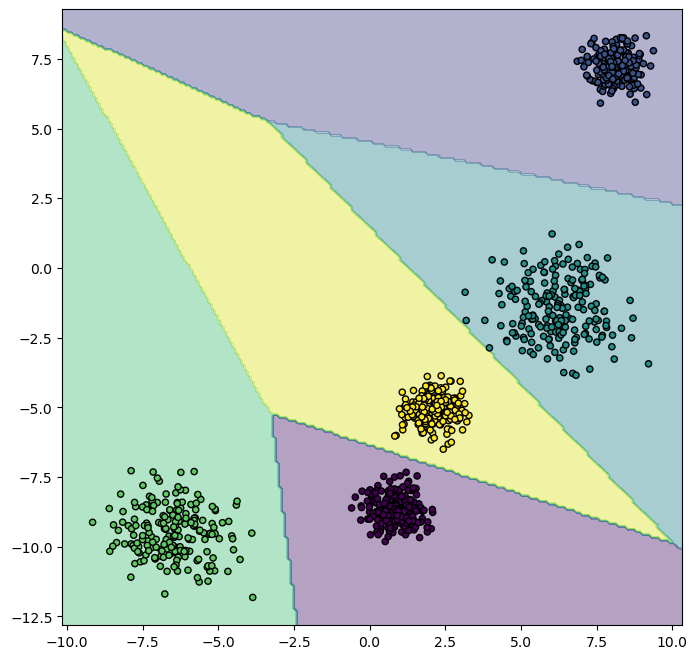

In [14]:
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor='k')
plt.show()

Indeed, the K-Means algorithm does not
behave very well when the blobs have very different diameters since all it cares about
when assigning an instance to a cluster is the distance to the centroid.
Instead of assigning each instance to a single cluster, which is called hard clustering, it
can be useful to just give each instance a score per cluster:  this is called soft clustering.
For example, the score can be the distance between the instance and the centroid, or
conversely it can be a similarity score (or affinity) such as the Gaussian Radial Basis
Function (introduced in Chapter 5). In the KMeans class, the transform() method
measures the distance from each instance to every centroid:

below code gives distance from each cluster centroid

In [15]:
kmeans.transform(X_new)#this gives score related to each instance to respective clusters

array([[10.69232508,  9.69518055,  7.12534231, 13.20625021,  7.40541568],
       [10.87012602,  7.35342261,  4.72508844, 14.91515957,  7.15586517],
       [12.28035799, 11.93441682, 10.25143394, 12.97417064,  9.57462608],
       [11.80676044, 12.12127329, 10.04505955, 12.49354249,  9.15552896]])

The K-Means Algorithm




So how does the algorithm work? Well it is really quite simple. Suppose you were
given the centroids: you could easily label all the instances in the dataset by assigning
each of them to the cluster whose centroid is closest. Conversely, if you were given all
the instance labels, you could easily locate all the centroids by computing the mean of
the instances for each cluster. But you are given neither the labels nor the centroids,
so how can you proceed? Well, just start by placing the centroids randomly (e.g., by
picking k instances at random and using their locations as centroids). Then label the
instances, update the centroids, label the instances, update the centroids, and so on
until the centroids stop moving. The algorithm is guaranteed to converge in a finite
number of steps (usually quite small), it will not oscillate forever2
. You can see the
algorithm in action in Figure 9-4: the centroids are initialized randomly (top left),
then the instances are labeled (top right), then the centroids are updated (center left),
the instances are relabeled (center right), and so on. As you can see, in just 3 itera‐
tions the algorithm has reached a clustering that seems close to optimal




Unfortunately, although the algorithm is guaranteed to converge, it may not converge
to the right solution (i.e., it may converge to a local optimum): this depends on the
centroid initialization. For example, Figure 9-5 shows two sub-optimal solutions that
the algorithm can converge to if you are not lucky with the random initialization step:


Let’s look at a few ways you can mitigate this risk by improving the centroid initializa‐
tion.


# Centroid Initialization Methods

If you happen to know approximately where the centroids should be (e.g., if you ran
another clustering algorithm earlier), then you can set the init hyperparameter to a
NumPy array containing the list of centroids, and set n_init to 1:

In [16]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)


# Accelerated K-Means and Mini-Batch K-Means
Another important improvement to the K-means algorithm was proposed and it considerably accelerated the algorithm by avoiding many unecessary distance calculations. This was achieved by exploiting the triangle inequality: The Norm of a Straight line is always the shortest distance between two points. The algorithm keeps track of lower and upper bounds for distances between instances and centroids. This Improvement is also implemented within sklearn.

Another paper proposed using mini-batches instead of the whole dataset for each iteration. This Speeds up the algorithm typically by a factor of three or four and make it possible to cluster huge datasets that don't fit into memory.

Let's use it in sklearn:

In [17]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

C:\Users\Saurabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=5)

If our dataset can't fit in memory, we can use memmap with the partial_fit() method.

The advantage of using MiniBtachKMeans becomes significant when we choose a big k for clusters. Batching becomes much faster and the performance stays roughly the same:



## Finding the Optimal Number of Clusters

We might be thinking that we can just pick the model with the lowest inretia. This poses a problem because increasing k will always give us a lower inretia.

Let's visualize inretia as a function of k:


As we may see, the inretia drops big when we go from 
 to 
 but then it decreases much more slowly we continue to increase 
. This curve has roughly the shape of an arm and there is an elbow at 
. So we pick 
.

This method of choosing the optimal number of clusters is rather coarse. A more precise and computationally expensive appraoch is to use the silhouette score, which is the mean silhouette coefficient over all the instances.

An instance silhouette score is equal to <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mfrac>
    <mrow>
      <mi>b</mi>
      <mo>&#x2212;</mo>
      <mi>a</mi>
        /
    </mrow>
    <mrow>
      <mi>m</mi>
      <mi>a</mi>
      <mi>x</mi>
      <mo stretchy="false">(</mo>
      <mi>a</mi>
      <mo>,</mo>
      <mi>b</mi>
      <mo stretchy="false">)</mo>
    </mrow>
  </mfrac>
  <mo>&#x2208;</mo>
  <mo stretchy="false">[</mo>
  <mo>&#x2212;</mo>
  <mn>1</mn>
  <mo>,</mo>
  <mn>1</mn>
  <mo stretchy="false">]</mo>
</math>
 

a: mean distance to other instances in the same cluster.
b: mean distance to instances in the next closest cluster.

 +1  means the instance is well inside its own cluster and far from other clusters.
 
  0 mens the instance is sitting on the edge between two clusters.
 -1 means the instance may just be on the wrong cluster.
The silhouette score measure a cluster density score.

Let's compute it using sklearn:

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
silhouette_score(X, minibatch_kmeans.labels_)

0.7696604224940856

Let's compare the silhouette score for different number of clusters:

In [20]:
scores = list()
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    scores.append(silhouette_score(X, kmeans.labels_))
    del(kmeans)

In [21]:
silhouette_score(X, minibatch_kmeans.labels_)


0.7696604224940856

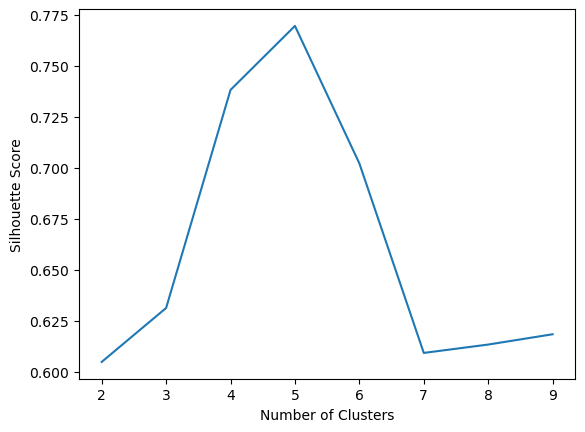

In [22]:
plt.plot(list(range(2, 10)), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

As you can see, this visualization is much richer than the previous one: in particular,
although it confirms that k=4 is a very good choice, it also underlines the fact that
k=5 is quite good as well, and much better than k=6 or 7. This was not visible when
comparing inertias.

# Limits of K-Means
KMeans is not perfect, so it is necessary to run the algorithm multiple times to avoid suboptimal solutions.

Aothor limiting factor of the algorithm is that we need to specify the number of clusters.

KMeans also doesn't behave very well when the clusters have varying sizes, different densities, or non-spherical shapes.

Depending on the data, different clustering algorithms may perform better (like DBSCAN or Gaussian Mixtures).

Scaling the inputs is also a must with KMeans.

Let's look at a few ways we can beenfit from clustering:



# Using Clustering for Image Segmentation

Image segmentation is the task of partitioning an image into multiple segments. All pixels that are part of the same object type get assigned to the same segment.

In instance segmentation, all pixels that are part of the same object get assigned to the same segment. The state of the art in semantic or instance segmentation today is achieved using complex architectures based on convolutional neural networks.

Here, we are going to do something much simpler, color segmentation. We will simply assign pixels to the same segment if they have similar color. Application: If we want to assess forest cover in a satellite image, color segmentation may be enough.

Let's do it:

In [23]:
from matplotlib.image import imread # you could also use `imageio.imread()`
import os

In [24]:
image = imread(os.path.join("images","clustering","doraemon.jpeg"))


In [25]:
image.shape

(500, 740, 3)

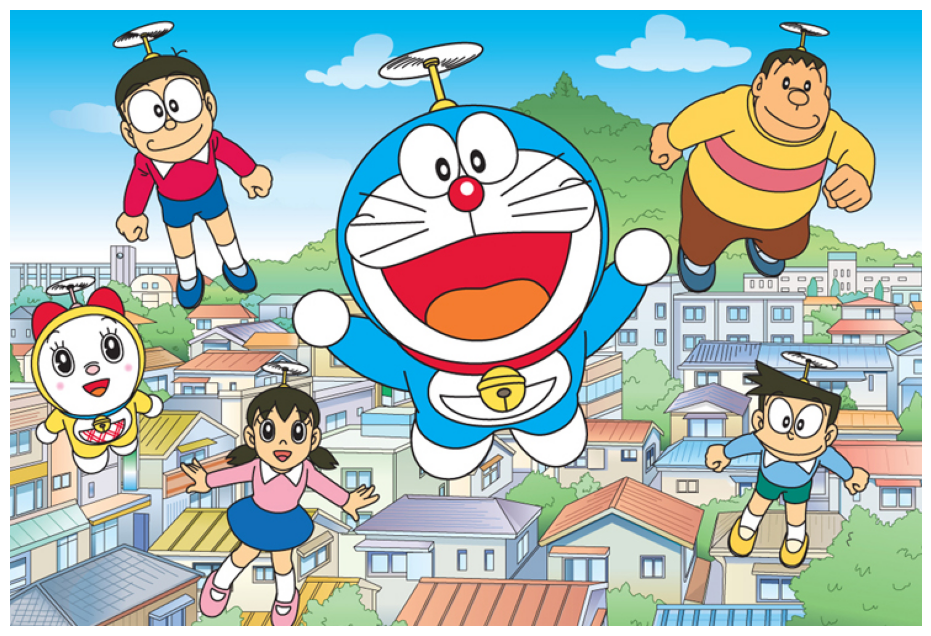

In [26]:
plt.figure(figsize=(12, 8))
plt.imshow(image.astype(int))
plt.axis('off')
plt.show()

In [27]:
X = image.reshape((-1, 1))
X.shape  

(1110000, 1)

In [28]:
print(image)

[[[  0 179 237]
  [  0 179 237]
  [  0 179 237]
  ...
  [  0 179 237]
  [  0 179 237]
  [  0 179 237]]

 [[  1 180 236]
  [  1 180 236]
  [  1 180 236]
  ...
  [  1 180 236]
  [  1 180 236]
  [  1 180 236]]

 [[  0 181 236]
  [  0 181 236]
  [  0 181 236]
  ...
  [  0 181 236]
  [  0 181 236]
  [  0 181 236]]

 ...

 [[199 206 216]
  [158 175 193]
  [177 189 205]
  ...
  [135 197 120]
  [134 198 120]
  [136 198 121]]

 [[171 184 203]
  [135 153 173]
  [179 193 206]
  ...
  [134 196 119]
  [133 197 119]
  [134 196 119]]

 [[129 155 172]
  [146 165 182]
  [160 177 193]
  ...
  [132 196 120]
  [131 195 119]
  [131 195 119]]]


In [41]:
print(X)

[[  0]
 [179]
 [237]
 ...
 [131]
 [195]
 [119]]


In [42]:
kmeans = KMeans(n_clusters=8).fit(X)

In [43]:
segmented_image = kmeans.cluster_centers_[kmeans.labels_]

In [44]:
segmented_image = segmented_image.reshape(image.shape)

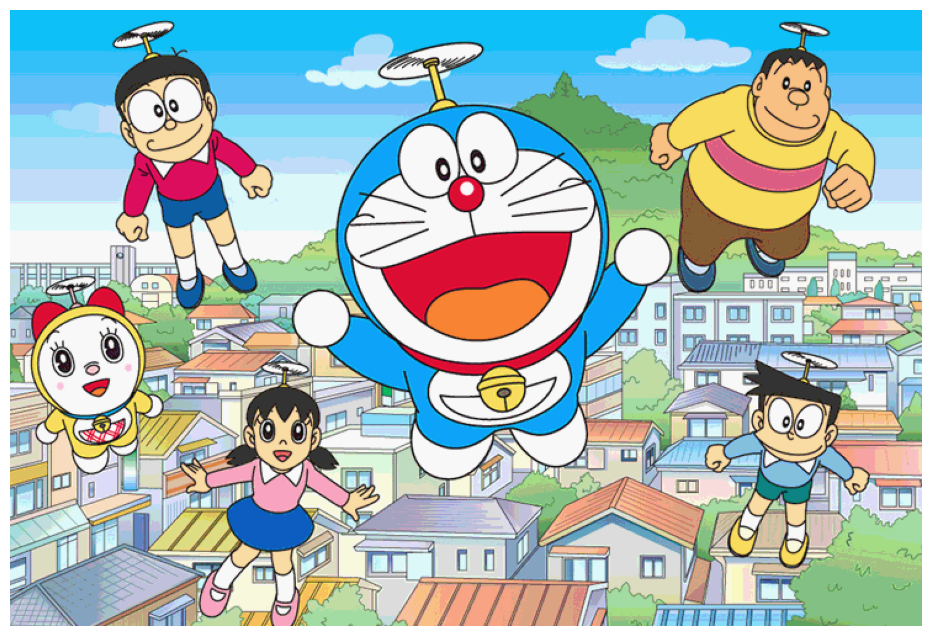

In [45]:
plt.figure(figsize=(12, 8))
plt.imshow(segmented_image.astype(int))
plt.axis('off')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=2).fit(X)

In [47]:
segmented_image = kmeans.cluster_centers_[kmeans.labels_]

In [48]:
segmented_image = segmented_image.reshape(image.shape)

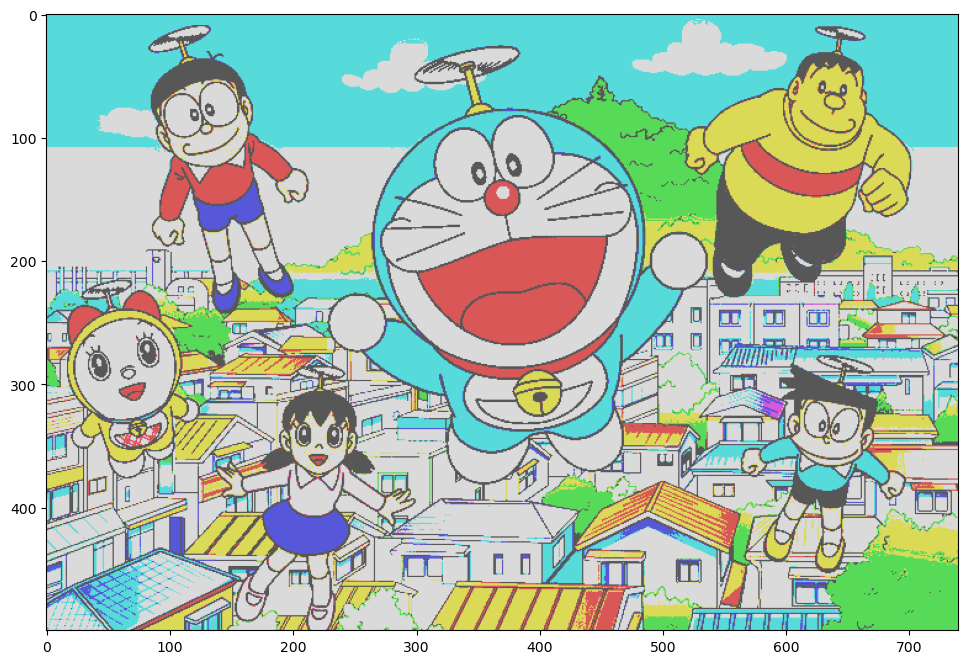

In [49]:
plt.figure(figsize=(12, 8))
plt.imshow(segmented_image.astype(int))
plt.axis('on')
plt.show()

as you can see by clustering it with 2 it converted given image pixels with two majour clusters and that clusters centers are used for representing pixel value
as you can segmented_image pixel value contains these 2 cluster center values now

That was not too hard, was it? Now let’s look at another application of clustering: pre‐
processing.

In [50]:
kmeans.cluster_centers_

array([[ 87.86432028],
       [218.59266174]])

In [51]:
kmeans.labels_

array([0, 1, 1, ..., 0, 1, 0])

In [52]:
plt.figure(figsize=(12, 8))
plt.scatter(image[:, 0], image[:, 1],image[:, 2] ,s=3) #here X[0] contains x1 and x2 which are splited 
plt.xlabel('x1')
plt.ylabel('x2')
plt.zlabel('x3')
plt.show()

TypeError: scatter() got multiple values for argument 's'

<Figure size 1200x800 with 0 Axes>

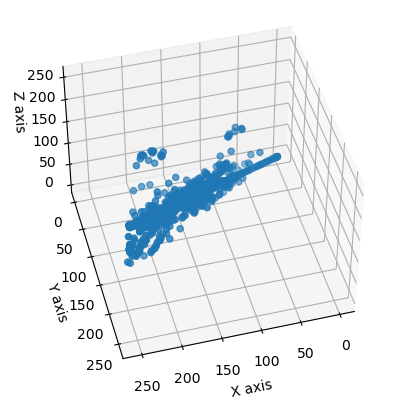

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = image[:, 0]
y = image[:, 1]
z = image[:, 2]

ax.scatter(x, y, z)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.view_init(elev=45, azim=75)
plt.show()

In [54]:
l = list()

In [55]:
for i in range(0,255):
    l.append(i)

In [56]:
l

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


<Figure size 6600x800 with 0 Axes>

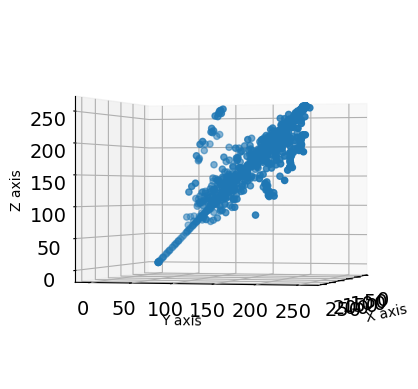

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(66, 8))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = image[:, 0]
y = image[:, 1]
z = image[:, 2]

ax.scatter(x, y, z)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.view_init(elev=0, azim=15)
plt.show()

In [ ]:
kmeans.cluster_centers_

In [ ]:
segmented_image #valaues of segmented_image are used by cluster_center values

# Using Clustering for Preprocessing

Clustering can be an efficient approach to dimensionality reduction. In particular, as a preprocessing step before a supervised learning algorithm.

As an example of using clustering for dimensionality reduction, let's tackle the small-digits dataset:

In [58]:
from sklearn.datasets import load_digits

In [59]:
X, y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1347, 64), (1347,), (450, 64), (450,))

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')

In [64]:
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [65]:
log_reg.score(X_test, y_test)

0.9666666666666667

In [66]:
from sklearn.pipeline import Pipeline

In [67]:
pipeline = Pipeline(steps=[
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression(solver='liblinear', multi_class='auto'))
])

In [68]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression(solver='liblinear'))])

In [69]:
pipeline.score(X_test, y_test)

0.9866666666666667

By reducing the dimensionality of the Input, we removed much of the noise and patterns and the instances were easier to get recognized by the logistic regressor, but we choose the number of clusters arbitrarily, we can surely do better.

We can use GridSearchCV to find the optimal number of clusters based on the final scoring by Logistic Regression:

In [ ]:
from sklearn.model_selection import GridSearchCV
param_dict = dict(kmeans__n_clusters=range(75,125))
grid_clf = GridSearchCV(pipeline, param_dict, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

In [ ]:
grid_clf.best_params_

In [ ]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy,zz = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1),
                     np.arange(z_min, z_max, 0.1))

In [ ]:
Z = kmeans.predict(np.c_[xx.ravel()])
Z = Z.reshape(xx.shape)

In [ ]:
y_pred = kmeans.predict(X)

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(X[:, 0], X[:, 1], X[:, 2], c=Z, edgecolor='k')
plt.show()

# Using Clustering for Preprocessing
Clustering can be an efficient approach to dimensionality reduction. In particular, as a preprocessing step before a supervised learning algorithm.

As an example of using clustering for dimensionality reduction, let's tackle the small-digits dataset:

For example, let’s tackle
the digits dataset which is a simple MNIST-like dataset containing 1,797 grayscale 8×8
images representing digits 0 to 9. First, let’s load the dataset:

In [ ]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)


Now, let’s split it into a training set and a test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)


Next, let’s fit a Logistic Regression model:


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

###  Let’s evaluate its accuracy on the test set:


In [ ]:
log_reg.score(X_test, y_test)


t’s our baseline: 0.9577% accuracy. Let’s see if we can do better by using KMeans as a preprocessing step.

We will create a pipeline that will first cluster the
training set into 50 clusters and replace the images with their distances to these 50
clusters, then apply a logistic regression model.

In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
 ("kmeans", KMeans(n_clusters=50)),
 ("log_reg", LogisticRegression()),
])
pipeline.fit(X_train, y_train)

In [ ]:
pipeline.score(X_test, y_test)

How about that? We almost divided the error rate by a factor of 2!

But we chose the number of clusters k completely arbitrarily, we can surely do better.
Since K-Means is just a preprocessing step in a classification pipeline, finding a good
value for k is much simpler than earlier: there’s no need to perform silhouette analysis
or minimize the inertia, the best value of k is simply the one that results in the best
classification performance during cross-validation. Let’s use GridSearchCV to find the
optimal number of clusters

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)


In [ ]:
grid_clf.best_params_


In [ ]:
grid_clf.score(X_test, y_test)

With k=90 clusters, we get a small accuracy boost, reaching 97.5% accuracy on the
test set. Cool!

# Using Clustering for Semi-Supervised Learning

In [ ]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

In [ ]:
log_reg.score(X_test, y_test)


In [ ]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]


In [ ]:
X_digits_dist

In [ ]:
X_representative_digits

In [ ]:
y_representative_digits = np.array([4, 8, 0, 6, 8, 3,7,7,9,2,5,5,8,5,2,1,2,9,6,1,1,6,9,0,8,3,0,7,4,1,6,5,2,3,1,8,6,3,9,2,4,2,9,4, 7, 6, 2, 3, 1, 1])

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_representative_digits, y_representative_digits)


In [ ]:
log_reg.score(X_test, y_test)

In [ ]:
representative_digit_idx

We've made a big jump in performance even though we are still training using the same number of data points. We could only do this by manually labelling representative instances. We get representative instances by running unsupervised clustering (k clusters) and taking the k instances closest to each of centroids.

However, what if we propagated the labels to all the other instances in the same cluster, this is called label propagation:

In [70]:
kmeans.labels_ == 0

array([ True, False, False, ...,  True, False,  True])

However, what if we propagated the labels to all the other instances in the same cluster, this is called label propagation:

In [71]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

NameError: name 'y_representative_digits' is not defined

Before we move on to Gaussian mixture models, let’s take a look at DBSCAN,
another popular clustering algorithm that illustrates a very different approach based
on local density estimation. This approach allows the algorithm to identify clusters of
arbitrary shapes.

# DBSCAN

In [73]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)


DBSCAN(eps=0.05)

In [74]:
dbscan.labels_

array([ 0,  1,  2,  0,  0,  0,  3,  0,  0, -1,  4,  5,  3,  0,  2, -1,  0,
        2,  3,  0,  0, -1, -1,  3,  0,  0,  0,  0,  2,  6, -1,  6,  0,  0,
        0,  1,  0,  0,  0,  0,  6,  5,  0,  6,  3,  2,  0,  5,  5,  3,  3,
        1,  0,  0,  0,  3,  7,  0,  2,  0,  2,  3,  3,  3,  0,  0,  0,  0,
        1,  8,  0,  1,  3,  0,  5,  5,  0,  0, -1, -1,  0,  2,  0, -1,  0,
        6,  2,  0,  3,  3,  2,  0,  0,  6,  6,  8,  6, -1,  3,  0,  4,  0,
        6,  6,  0,  8,  3,  2,  0,  3,  6,  6,  0,  0,  0,  2,  8,  0,  0,
        3,  2,  1,  0,  2,  3,  6,  2,  3,  0,  0,  0,  0,  0, -1,  6,  0,
        0,  0,  0,  0,  0,  0,  0,  3,  0,  6,  3,  3,  0,  3,  0,  2,  0,
        0,  5,  2, -1,  3,  0,  6,  2,  3,  6,  6,  2,  0,  0,  0,  0,  7,
        3,  6,  2,  0,  0,  6,  2,  6, -1,  5,  3,  0, -1,  6,  0,  0,  6,
        0,  3,  5,  0,  0,  0,  0,  3,  3,  0,  0,  1,  6,  3,  0,  5,  8,
        5,  6,  3,  0,  0,  0,  1,  3,  0,  0,  2,  0,  0,  0,  5,  2,  0,
        0,  0,  3,  5,  0